## Algorytmy ewolucyjne

In [227]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

Napisać podstawowy algorytm genetyczny z mutacją gaussowską i krzyżowaniem jednopunktowym. Sprawdzić działanie algorytmu na funkcji x2+y2+2z2 oraz na pięciowymiarowej funkcji Rastrigina.

In [223]:
def my_func(individual):
    x, y, z = individual
    return x**2 + y**2 + 2*z**2

def rastrigin5(individual):
    A = 10
    n = len(individual)
    return A * n + np.sum(individual**2 - A * np.cos(2 * np.pi * individual))

In [266]:
class AE:
    
    def __init__(self, dimension, population_size, generations=100):
        self.dimension = dimension
        self.population_size = population_size
        self.population = np.random.randn(population_size, dimension)
        self.generations = generations
        self.mutation_rate = None
        self.crossover_rate = None
        self.fitness_function = None
    
    def point_crossover(self, parent1, parent2):
        if np.random.rand() < self.crossover_rate:
            point = np.random.randint(1, self.dimension)
            child1 = np.concatenate((parent1[:point], parent2[point:]))
            child2 = np.concatenate((parent2[:point], parent1[point:]))
            return child1, child2
        return parent1, parent2
    
    def gaussian_mutation(self, individual):
        if np.random.rand() < self.mutation_rate:
            individual += np.random.normal(0, 1, self.dimension)
        return individual
    
    def evaluation(self, population):
        return np.apply_along_axis(self.fitness_function, 1, population)
    
    def wheel_selection(self, population):
        fitness = self.evaluation(self.population)
        fitness_inverted = 1 / fitness
        probabilities = fitness_inverted / np.sum(fitness_inverted)
        selected_indices = np.random.choice(self.population_size, self.population_size, p=probabilities)
        # print(selected_indices)
        return population[selected_indices]
    
    def choose_random_individuals(self, population_size, n):
        individuals = self.population[np.random.choice(population_size, n, replace=False)]
        if n == 1:
            return individuals[0]
        else:
            return individuals
    
    def train(self, fitness_function, mutation_rate=0.1, crossover_rate=0.7, mute_print=False):
        
        self.fitness_function = fitness_function
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        
        best_fitness_history = []
        
        for generation in range(self.generations):

            new_population = []
            while len(new_population) < self.population_size: # -> hiperparametr
            # for i in range(int(self.population_size / 2)):
                parent1, parent2 = self.choose_random_individuals(self.population_size, 2)
                child1, child2 = self.point_crossover(parent1, parent2)
                new_population.extend([child1, child2])
            population = np.vstack([self.population, np.array(new_population)])
            
            for i, parent in enumerate(population):
                child = self.gaussian_mutation(parent)
                population[i] = child
            # dodać zmutowane
                
            self.population = self.wheel_selection(population)
            
            fitness = self.evaluation(self.population)
            best_individual = self.population[np.argmin(fitness)]
            best_fitness = fitness_function(best_individual)
            # zostwic top 10%
            best_fitness_history.append(best_fitness)
            if not mute_print:
                print(f"Generation {generation+1}: best individual: {best_individual}, fitness: {best_fitness}")
        
        if mute_print:
            print(f"Best individual: {best_individual}, fitness: {best_fitness}")
        history = History(best_fitness_history)
        return history, (best_individual, best_fitness)
    
class History:
    
    def __init__(self, fitness):
        self.fitness = fitness
        self.generations = list(range(len(fitness)))
    
    def plot_history(self):
        plt.plot(self.generations, self.fitness)
        plt.ylabel("Best individual fitness")
        plt.xlabel("Generation")
        plt.title("Evolution history")
        plt.show()

### 3 dimensional function

Best individual: [0.23608842 0.30915235 0.40795494], fitness: 0.48416738135311044


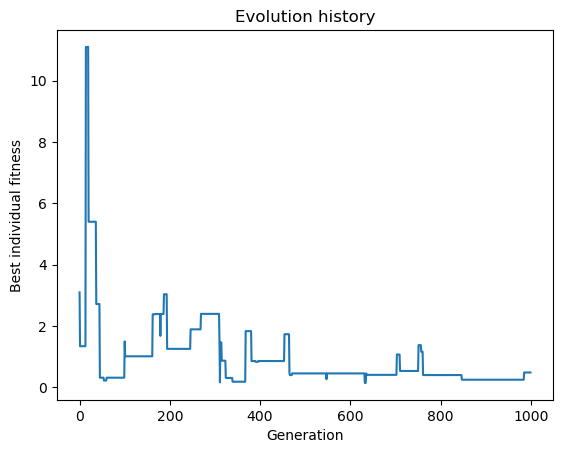

In [245]:
ae = AE(3, 5, 1000)
history, _ = ae.train(my_func, mute_print=True)
history.plot_history()

Best individual: [-0.06458238  0.04746075 -0.13425851], fitness: 0.042474103048682446


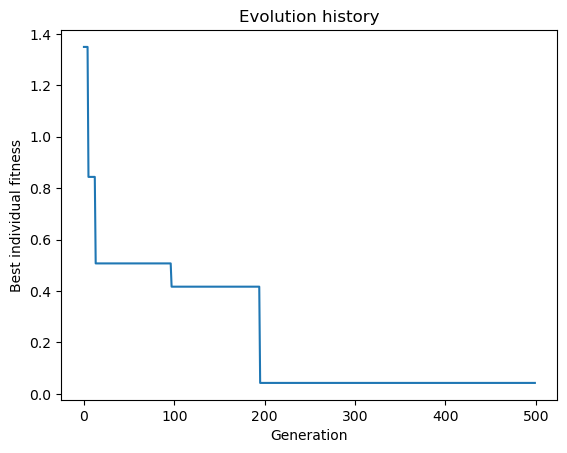

In [243]:
ae = AE(3, 10, 500)
history, _ = ae.train(my_func, mute_print=True)
history.plot_history()

Best individual: [ 0.04259045 -0.07173943 -0.050854  ], fitness: 0.012132749084806042


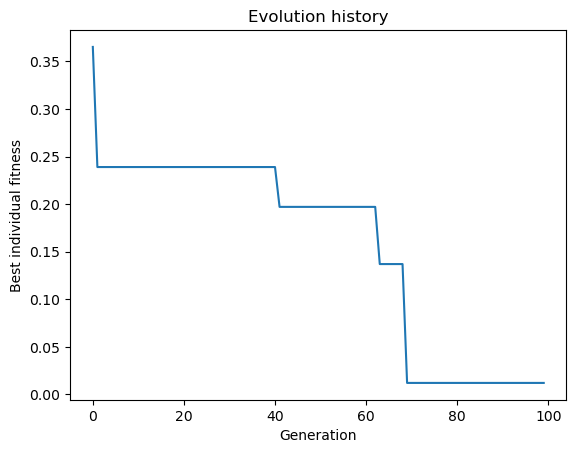

In [242]:
ae = AE(3, 50, 100)
history, _ = ae.train(my_func, mute_print=True)
history.plot_history()

Best individual: [-0.07327969  0.10620891  0.19221373], fitness: 0.09054248326695168


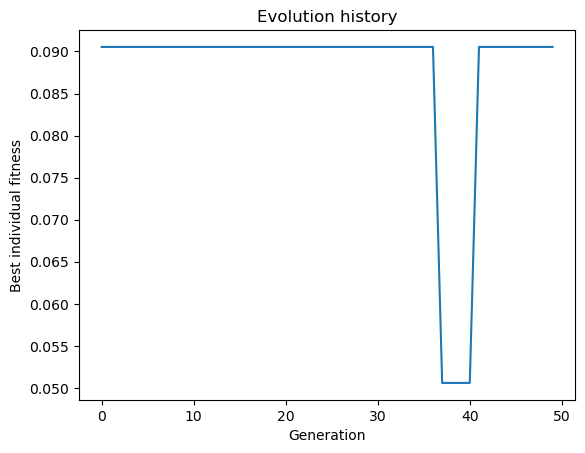

In [244]:
ae = AE(3, 100, 50)
history, _ = ae.train(my_func, mute_print=True)
history.plot_history()

Best individual: [-0.09239069  0.00457675 -0.06524614], fitness: 0.017071105363303682


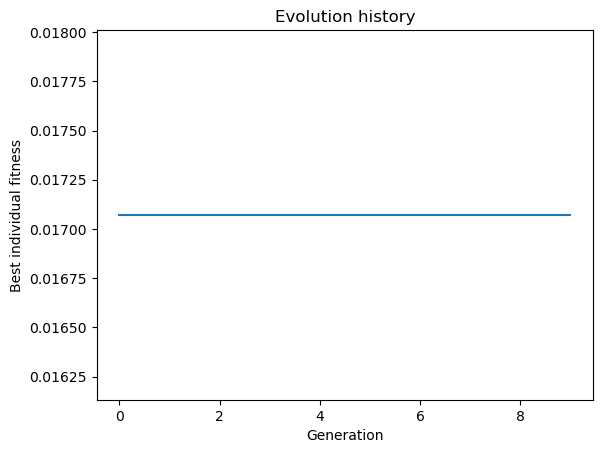

In [246]:
ae = AE(3, 500, 10)
history, _ = ae.train(my_func, mute_print=True)
history.plot_history()

### Rasgridin

Best individual: [ 0.91715876 -0.95987156  0.88899631], fitness: 6.528573051968358


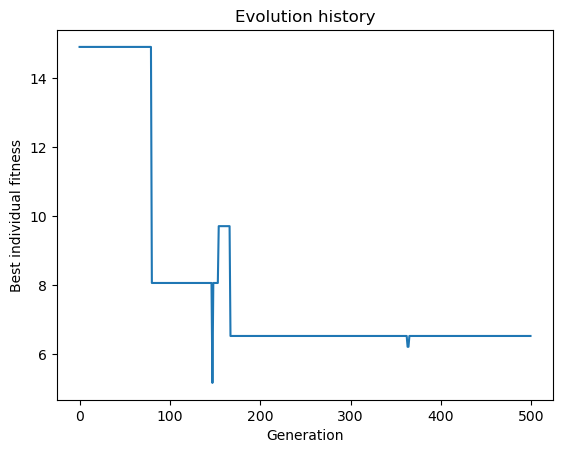

In [248]:
ae = AE(3, 10, 500)
history, _ = ae.train(rastrigin5, mute_print=True)
history.plot_history()

Best individual: [-0.03640822 -0.11999754  2.06445406], fitness: 8.05730362999105


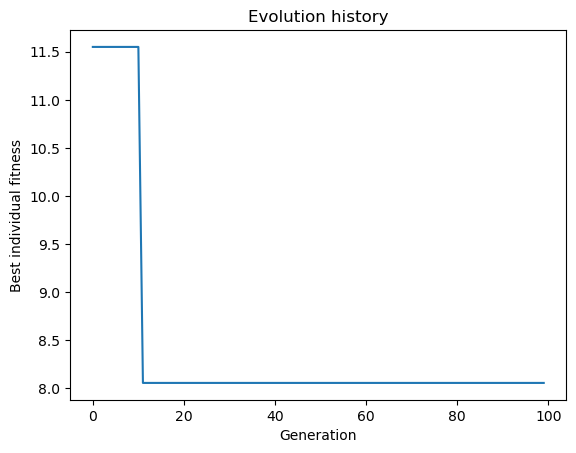

In [249]:
ae = AE(3, 50, 100)
history, _ = ae.train(rastrigin5, mute_print=True)
history.plot_history()

Best individual: [ 0.04780648  0.06363739 -0.04279057], fitness: 1.603964124917411


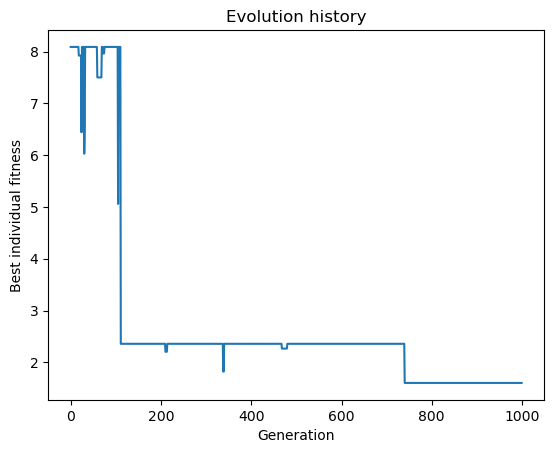

In [286]:
ae = AE(3, 100, 1000)
history, _ = ae.train(rastrigin5, mute_print=True)
history.plot_history()

In [252]:
### modyfikacja

Best individual: [0.98491956 1.0006022  0.89391092], fitness: 4.955852001065093


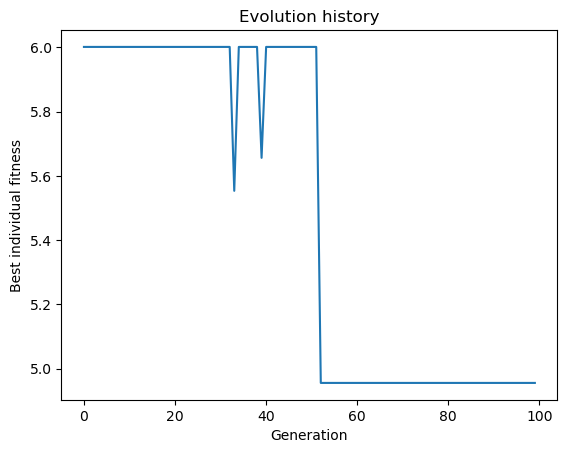

In [270]:
ae = AE(3, 50, 100)
history, _ = ae.train(rastrigin5, mute_print=True)
history.plot_history()